
# CHRIST (Deemed to be University)
## Department of Computer Science


## 5MCA-A - Neural Networks and Deep Learning (MCA572)


---
  
### ETE III - LAB TEST

*Q2 CNN Autoencoder for Image Reconstruction*

---

**Anupam Kumar 2347104**

*04 -12-  2024*

### Step 1: Import Libraries

In [10]:
# Importing required libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers, models

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)


### Step 2: Import the Dataset
Import Directly from Kaggle and save to a kaggle subdirectory

In [1]:
from google.colab import files

# Upload kaggle.json
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anupamkumar2347104","key":"58b17dfcd946a7a882b22e07df493c2c"}'}

In [ ]:
import os

# Move the kaggle.json file to the Kaggle directory
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset using the Kaggle CLI
!kaggle datasets download -d codebreaker619/columbia-university-image-library

# Unzip the downloaded dataset
!unzip columbia-university-image-library.zip -d columbia_images


### Explore the Dataset

Displaying image: columbia_images/coil-20/coil-20-proc/obj7__67.png


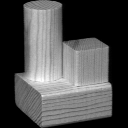

Displaying image: columbia_images/coil-20/coil-20-unproc/obj1__6.png


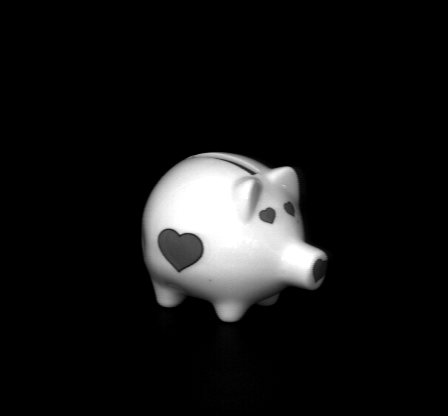

In [12]:
import os
from PIL import Image
from IPython.display import display

# Define the dataset path
dataset_path = "columbia_images"

# List all directories and files
for root, dirs, files in os.walk(dataset_path):
    # Iterate over image files inside subdirectories
    for file in files:
        # Get the full path of the image file
        file_path = os.path.join(root, file)

        # Check if the file is an image (by extension)
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.gif')):
            # Open and display the image
            img = Image.open(file_path)
            print(f"Displaying image: {file_path}")
            display(img)  # Show image inline in the notebook
            break  # Stop after displaying the first image


### Step 3: Load and Preprocess the Dataset
Load images from the dataset directory, resize them, normalize pixel values, and split into training and testing sets.

In [13]:
# Load and preprocess the dataset
def load_images(dataset_path, img_size=(64, 64)):
    images = []
    for root, _, files in os.walk(dataset_path):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                img_path = os.path.join(root, file)
                img = Image.open(img_path).convert('L')  # Convert to grayscale
                img = img.resize(img_size)  # Resize to a fixed size
                images.append(np.array(img) / 255.0)  # Normalize pixel values
    return np.array(images)

# Path to dataset
dataset_path = "columbia_images"

# Load images
images = load_images(dataset_path)

# Reshape for CNN input
images = images.reshape((-1, 64, 64, 1))

# Split into training and testing sets
X_train, X_test = train_test_split(images, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (1440, 64, 64, 1)
Testing set size: (360, 64, 64, 1)


Data Split into 80%(train) - 20%(test)

### Step 4: Exploratory Data Analysis (EDA)
Visualize a few samples from the dataset.

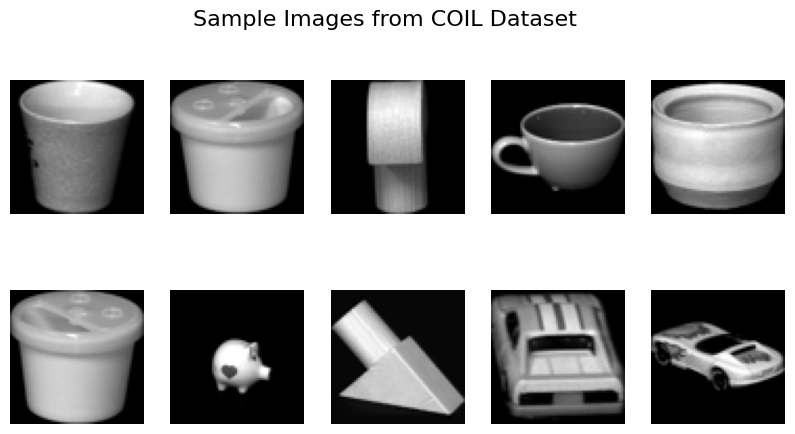

In [14]:
# Display a few images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i].squeeze(), cmap='gray')
    plt.axis('off')
plt.suptitle("Sample Images from COIL Dataset", fontsize=16)
plt.show()


### Step 5: Build the CNN Autoencoder
Construct the Encoder and Decoder


In [15]:
# CNN Autoencoder Model
def build_autoencoder(input_shape):
    # Encoder
    encoder = tf.keras.Sequential([
        layers.Input(shape=input_shape),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2), padding='same'),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2), padding='same'),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2), padding='same')
    ])

    # Decoder
    decoder = tf.keras.Sequential([
        layers.Conv2DTranspose(128, (3, 3), activation='relu', padding='same'),
        layers.UpSampling2D((2, 2)),
        layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same'),
        layers.UpSampling2D((2, 2)),
        layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same'),
        layers.UpSampling2D((2, 2)),
        layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')
    ])

    # Autoencoder
    autoencoder = tf.keras.Sequential([encoder, decoder])
    return autoencoder

# Build the model
input_shape = (64, 64, 1)
autoencoder = build_autoencoder(input_shape)

# Compile the model
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')
autoencoder.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 8, 8, 128)           │          92,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 64, 64, 1)           │         240,129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 332,801 (1.27 MB)

 Trainable params: 332,801 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# Install necessary libraries for model visualization
!pip install pydot
!apt-get install graphviz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


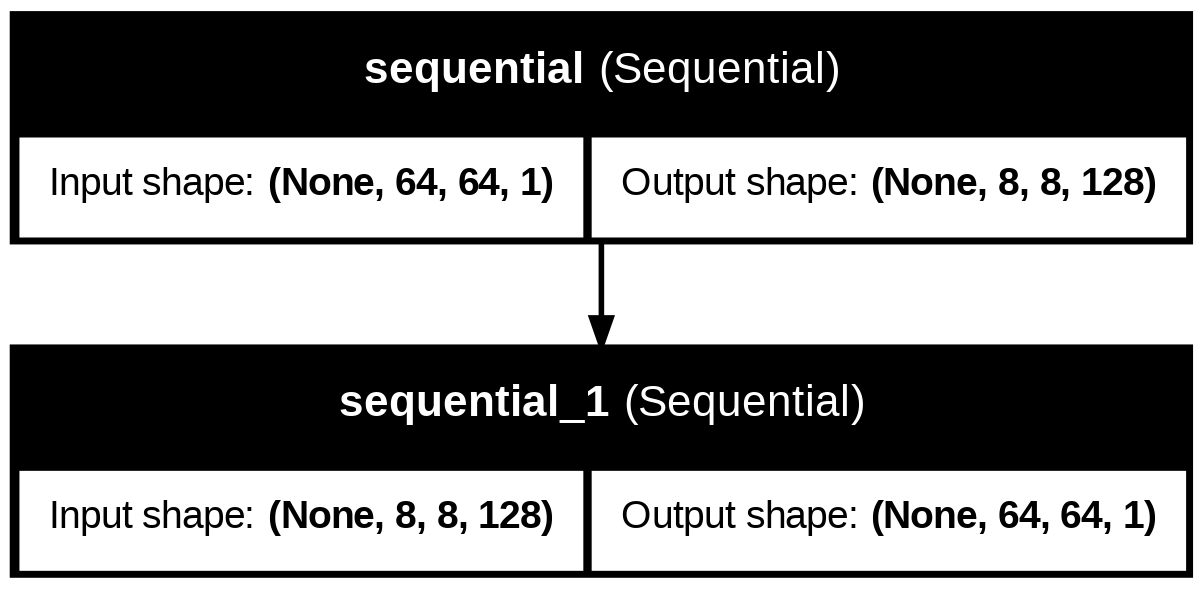

In [20]:
# Visualize the architecture of the CNN Autoencoder
from tensorflow.keras.utils import plot_model

# Plot the model
plot_model(autoencoder, to_file='autoencoder_architecture.png', show_shapes=True, show_layer_names=True)

# Display the plot in Colab
from IPython.display import Image
Image(filename='autoencoder_architecture.png')


Architecture:

The CNN autoencoder consists of:
- Encoder:
Conv2D layers extract features from the input image using 3x3 filters.
MaxPooling2D reduces the image size after each convolution, downsampling the spatial dimensions.
- Decoder:
Conv2DTranspose layers upsample the compressed image back to the original size.
UpSampling2D further increases the image's spatial dimensions.
- Autoencoder:
The model combines the encoder and decoder to learn a compact representation and reconstruct the input image.
It's compiled with the Adam optimizer and MSE loss function for reconstruction tasks.

The input shape is (64, 64, 1) (grayscale), and the model is suitable for tasks like image denoising or anomaly detection.








### Step 6: Train the Model
Train the model using the training dataset and visualize the loss curve.

- Uses Mean Squared Error (MSE) as the loss function to compare the original and reconstructed images.
- Optimizes the model using Adam optimizer with a learning rate of 0.001.
- Trains the model for 20 epochs with a batch size of 32.


Epoch 1/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0030 - val_loss: 0.0036
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0031 - val_loss: 0.0032
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0029 - val_loss: 0.0030
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0027 - val_loss: 0.0030
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0028 - val_loss: 0.0030
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0028 - val_loss: 0.0029
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0027 - val_loss: 0.0031
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0026 - val_loss: 0.0029
Epoch 9/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0026 - val_loss: 0.0027
Epoch 10/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0026 - val_loss: 0.0028
Epoch 11/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0025 - val_loss: 0.0027
Epoch 12/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0024 - 

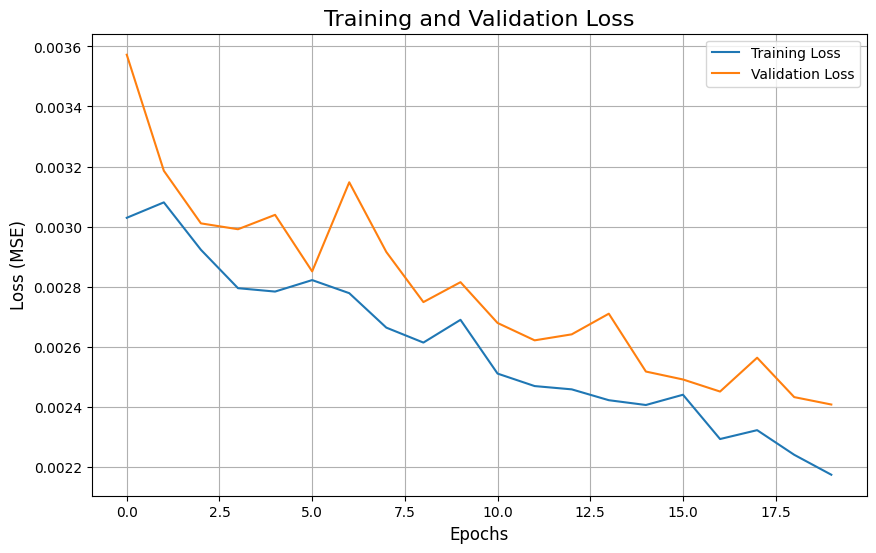

In [23]:
# Train the autoencoder
history = autoencoder.fit(
    X_train, X_train,  # Input and output are the same for reconstruction
    epochs=20,
    batch_size=32,
    validation_data=(X_test, X_test),
    verbose=1
)

# Loss Curve: Training vs. Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss (MSE)', fontsize=12)
plt.legend(loc='upper right')
plt.grid(True)
plt.show()



Loss Curve:

The loss curve shows how the model's performance improved over 20 epochs.

Validation loss indicates the model's generalization.

The model is learning well, with both training and validation losses decreasing and staying close, showing good generalization. Minor fluctuation around epoch 10 is normal and stabilizes later. No signs of overfitting—great performance overall!








### Step 7: Evaluate and Visualize Results
Evaluate the model on the test set, calculate MSE, and visualize original vs. reconstructed images.

In [21]:
# Evaluate the model
test_loss = autoencoder.evaluate(X_test, X_test)
print(f"Test MSE: {test_loss:.4f}")



12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0034
Test MSE: 0.0035


The **Test MSE (Mean Squared Error)** of **0.0035** indicates that the autoencoder is reconstructing the test data with very low error. This shows the model has effectively learned the data patterns and is performing well on unseen data.

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


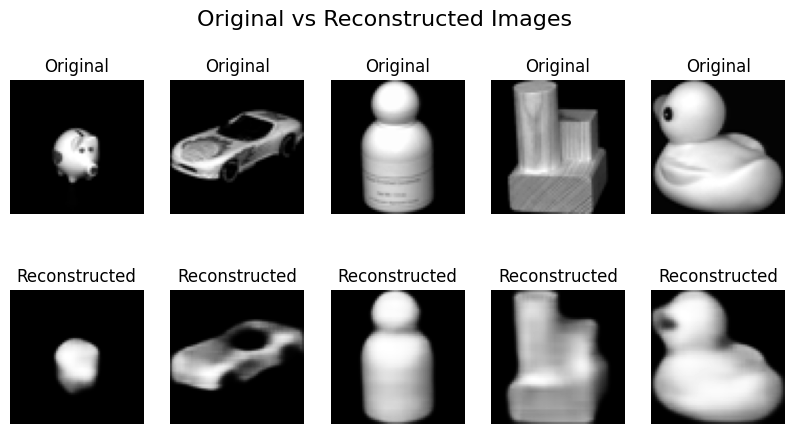

In [22]:
# Visualize original and reconstructed images
reconstructed_images = autoencoder.predict(X_test)

# Plot original and reconstructed images
plt.figure(figsize=(10, 5))
for i in range(5):
    # Original image
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].squeeze(), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed image
    plt.subplot(2, 5, i + 6)
    plt.imshow(reconstructed_images[i].squeeze(), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.suptitle("Original vs Reconstructed Images", fontsize=16)
plt.show()


The reconstructed images are visually similar to the originals, demonstrating the effectiveness of the model.This can be imporved with more layers and by increasing the epochs or learaning rate.